Naveeda Ali
<br>
Due date: Mar. 12, 2024, 11:59pm
<br>
PHYS 2030 W24

# <center><font color=#46769B>Homework assignment 8</font></center>

__Rubric (100 points total)__:

- Problem 1a - __30 points__

- Problem 1b - __30 points__
     
- Problem 2 - __40 points__

</font>

## <font color=#46769B>Introduction: Higher-order methods for solving Initial Value Problems (IVPs)</font>


Our goals for this notebook are:
- Gain experience with Runge-Kutta (RK) and leapfrog methods.

Required reading:
- *Lesson 8: Higher-order methods*

- *Lesson 9: Leapfrog method*

## <font color=#46769B>Problem 1: Kapitza's pendulum</font>

### <font color=#46769B>Introduction</font>

Kapitza's pendulum is a pendulum in which the pivot is attached to a motor that causes the pivot to move up and down. 

<div>
<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/figures/KapitzaPendulumScheme.gif" width="240">
</div>

We assume that the vertical motion of the pivot is periodic, described by

$$y(t) = A \, \cos(\nu t)$$

where $A$ is the amplitude and $\nu$ is the angular frequency of the pivot's motion up and down. Recalling that the formula for torque is $\tau = F \ell \sin(\theta)$, where $F = m y''(t)$ is the force due to the pivot's motion on the pendulum arm and $\theta$ is the relative angle between the pendulum and the vertical, we arrive an equation of motion:

$$\theta''(t) + \omega^2 \sin(\theta(t)) + A \nu^2 \cos(\nu t) \sin(\theta(t)) = 0\, . \qquad (1)$$

The usual simple pendulum (recoved by setting $A=0$ above) has two equilibrium positions:

- Stable equilibrium point at $\theta=0$ (hanging straight down). A small push away from $\theta=0$ will lead to small oscillations around the point $\theta=0$.

- Unstable equilibrium point at $\theta = \pi$ (pointing straight up). An arbitrarily small push away from $\theta=\pi$ will lead to a large displacement.

The unusual feature of Kapitsa's pendulum is that a rapid driving force can cause the unstable point at $\theta=\pi$ *to become stable*. Here are one [video](https://www.youtube.com/watch?v=cjGqxF79ITI) and another [video](https://www.youtube.com/watch?v=GgYABmG_bto) that illustrate this phenomenon in action. (Some further links for the interested reader are [here](https://gereshes.com/2019/02/25/kapitzas-pendulum/) and [here](https://en.wikipedia.org/wiki/Kapitza%27s_pendulum).)

### <font color=#46769B>Part (a)</font>

Your tasks are as follows:

- Write a code to solve the equation of motion (1) for Kapitza's pendulum for the initial condition $ \theta(0) = 3$ and $\theta'(0) = 0$, over the time interval $[0,10]$, using the RK4 method. As in previous exercises, perform a convergence test to check that your results have converged to within a tolerance of `atol=rtol=1e-2`. Take the following numerical inputs

$$\omega = 2\pi , \quad A = 0.1, \quad \nu = 100$$

- Make a plot showing $\theta(t)$ vs $t$ for Kapitsa's pendulum. Show also in the same plot, $\theta(t)$ vs $t$ for the simple pendulum with the same initial condition (i.e., solving the same ODE but with $A=0$). Include a legend and axes labels for your plot.

- Make a __phase portrait__ plot of $\theta'(t)$ vs $\theta(t)$ for both Kapitsa's pendulum and the simple pendulum (in separate plots). This plot is a nice way to visualize both position and velocity of a trajectory. It is easy to implement from your numerical solutions. Suppose your solutions are saved in a `numpy.array` named `y`, which has size $(N+1) \times 2$. Then you simply do:
```py
theta = y[:,0]
theta_prime = y[:,1]
plt.plot(theta,theta_prime)
```
since recall $\mathbf{y} = (\theta,\theta^\prime)$. Make your plot a square shape using the `figsize` keyword.

Feel free to use `scipy.integrate.solve_ivp` to check your numerical results, but it is not mandatory. Note if you do use `solve_ivp`, it may be useful to increase the tolerance settings by adding thse keywords, e.g., `atol=1e-10, rtol=1e-10`.


Not converged yet. Trying 200 steps.
Not converged yet. Trying 400 steps.
Not converged yet. Trying 800 steps.
Not converged yet. Trying 1600 steps.
Not converged yet. Trying 3200 steps.
Not converged yet. Trying 6400 steps.
Converged with 6400 steps.


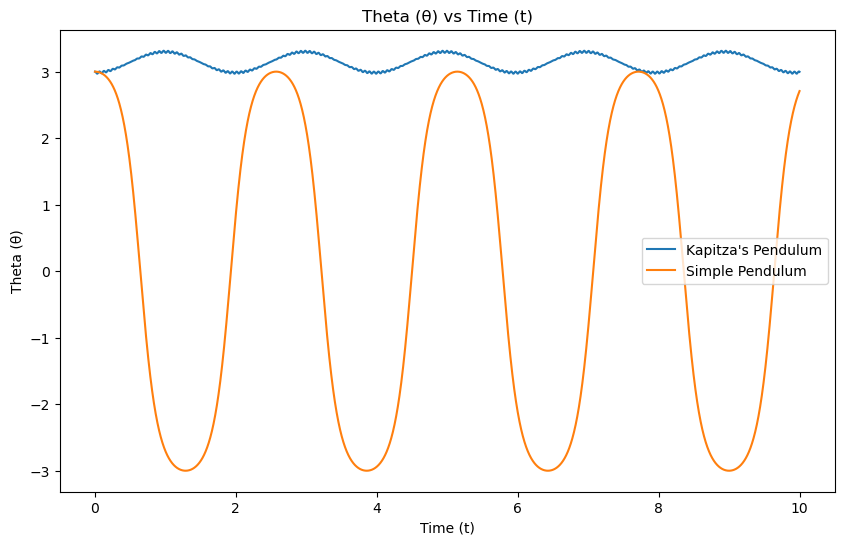

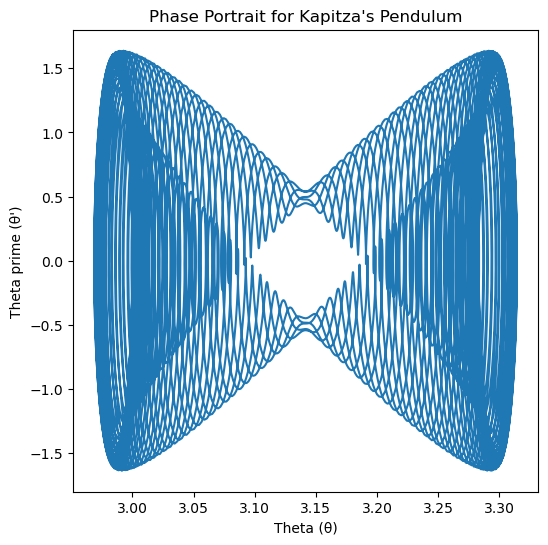

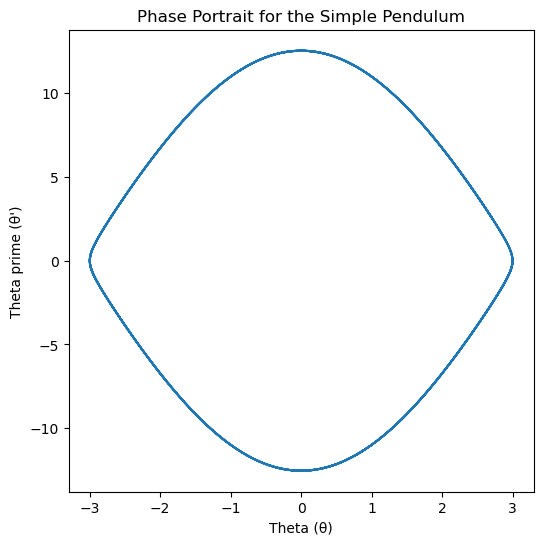

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Constants
omega = 2 * np.pi
A = 0.1
nu = 100
theta_0 = 3
theta_prime = 0 
t0, tf = 0, 10

#Define f(t,y) with omega parameter
def f(t, y, A):
    theta, theta_prime = y
    return np.array([theta_prime, -omega**2 * np.sin(theta) - A * nu**2 * np.cos(nu*t) * np.sin(theta)])

#Define RK4 method 
def RK4(num_steps, theta_0, A):
    t = np.linspace(t0, tf, num_steps + 1)
    h = (tf - t0) / num_steps
    y = np.zeros((num_steps + 1, 2))
    y[0] = np.array([theta_0, theta_prime])
    
    for i in range(num_steps):
        ti = t[i]
        yi = y[i]
        k1 = f(ti, yi, A)
        k2 = f(ti + h/2, yi + h/2 * k1, A)
        k3 = f(ti + h/2, yi + h/2 * k2, A)
        k4 = f(ti + h, yi + h * k3, A)
        k = (k1 + 2*k2 + 2*k3 + k4) / 6
        y[i + 1] = yi + h * k
    return t, y

#Find convergence for RK4 method 
num_steps = 100
t_old, y_old = RK4(num_steps, theta_0, A)
converged = False

#Find what number of steps convergence will occur
while not(converged):
    #Try double steps
    num_steps *= 2
    print("Not converged yet. Trying", num_steps, "steps.")
    t_new, y_new = RK4(num_steps, theta_0, A)
    converged = np.allclose(y_old[:, 0], y_new[::2, 0], atol=1e-2, rtol=1e-2) and \
                np.allclose(y_old[:, 1], y_new[::2, 1], atol=1e-2, rtol=1e-2)
    y_old = y_new

print("Converged with", num_steps, "steps.")

#Plot solutions of Kapitza's and simple pendulum using RK4 results
t_kapitza, y_kapitza = RK4(num_steps, theta_0, A)
t_simple, y_simple = RK4(num_steps, theta_0, 0)  # For simple pendulum, A = 0

plt.figure(figsize=(10, 6))
plt.plot(t_kapitza, y_kapitza[:, 0], label="Kapitza's Pendulum")
plt.plot(t_simple, y_simple[:, 0], label="Simple Pendulum")
plt.xlabel('Time (t)')
plt.ylabel('Theta (θ)')
plt.title('Theta (θ) vs Time (t)')
plt.legend()
plt.show()

#Phase portrait for Kapitza's pendulum
plt.figure(figsize=(6, 6))
plt.plot(y_kapitza[:, 0], y_kapitza[:, 1])
plt.xlabel('Theta (θ)')
plt.ylabel('Theta prime (θ\')')
plt.title("Phase Portrait for Kapitza's Pendulum")

#Phase portrait for simple pendulum
plt.figure(figsize=(6, 6))
plt.plot(y_simple[:, 0], y_simple[:, 1])
plt.xlabel('Theta (θ)')
plt.ylabel('Theta prime (θ\')')
plt.title('Phase Portrait for the Simple Pendulum')
plt.show()

#Evaluate solutions of Kapitza's and Simple pendulum using solve_ivp
t_eval= np.linspace(t0, tf, num_steps + 1)
kapitza_sol = solve_ivp(f, [t0,tf], [theta_0,theta_prime], args=(A,), t_eval=t_eval, method='RK45',rtol=1e-10, atol=1e-10)
simple_sol = solve_ivp(f, [t0,tf], [theta_0,theta_prime], args=(0,), t_eval=t_eval, method='RK45',rtol=1e-10, atol=1e-10)



## <font color=#46769B>Part (b)</font>

In Part (a), you noticed that Kapitza's pendulum seems to oscillate around an equilibrium $\theta_{\rm eq} = \pi$, while the simple pendulum oscillates around $\theta_{\rm eq} = 0$. A simple way to see this more clearly is to include a damping term

$$\theta''(t) + \gamma \theta'(t) + \omega^2 \sin(\theta(t)) + A \nu^2 \cos(\nu t) \sin(\theta(t)) = 0\, \qquad (2)$$

and seeing where the pendulum ends up after its motion has been damped away, i.e., 

$$\theta(t_f) \approx \theta_{\rm eq} \, .$$

Here set $\gamma = 1$ and consider the same time interval $[0,10]$. 

Your task is:

- Repeat the tasks of Part (a), with solving Eq. (2) instead of Eq. (1).

- Determine $\theta_{\rm eq}$.

Next, consider the following more general initial condition 

$$\theta(0) = \theta_0, \quad \theta'(0) = 0 \, ,$$

that is, an arbitrary initial displacement $\theta_0$. It turns out that for small initial displacements $\theta_0$, the Kapitza's pendulum will relax to zero (hanging down), while for larger initial displacements, the pendulum will relax to hanging straight up.

- Determine the value of $\theta_{\rm eq}$ as a function of the initial displacement $\theta_0$. Plot your results for $\theta_{\rm eq}$ as a function of $\theta_0$.

- Determine the critical initial displacement value for $\theta_0$ below which Kapitza's pendulum relaxes to $\theta_{\rm eq} = 0$ and above which it relaxes to $\theta_{\rm eq} = \pi$.



Not converged yet. Trying 200 steps.
Not converged yet. Trying 400 steps.
Not converged yet. Trying 800 steps.
Not converged yet. Trying 1600 steps.
Not converged yet. Trying 3200 steps.
Converged with 3200 steps.


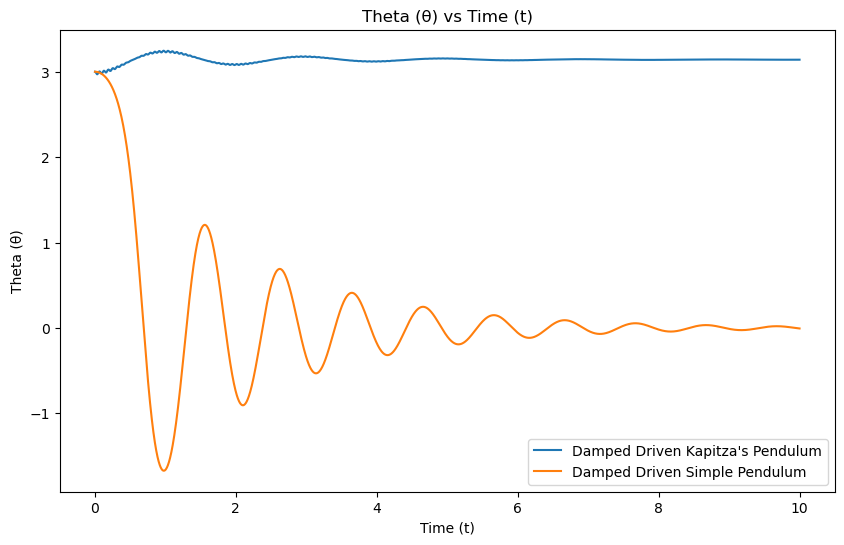

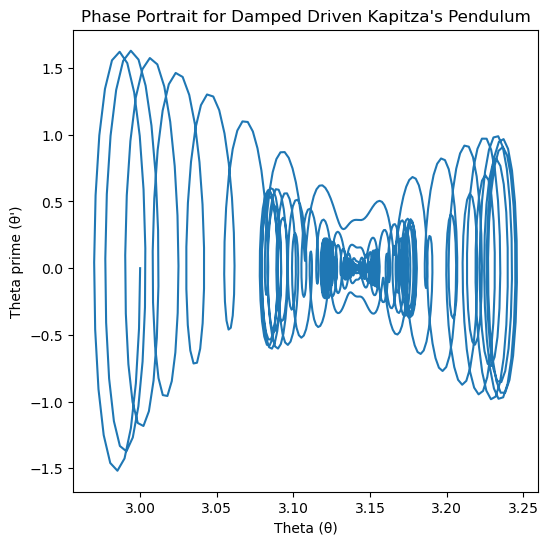

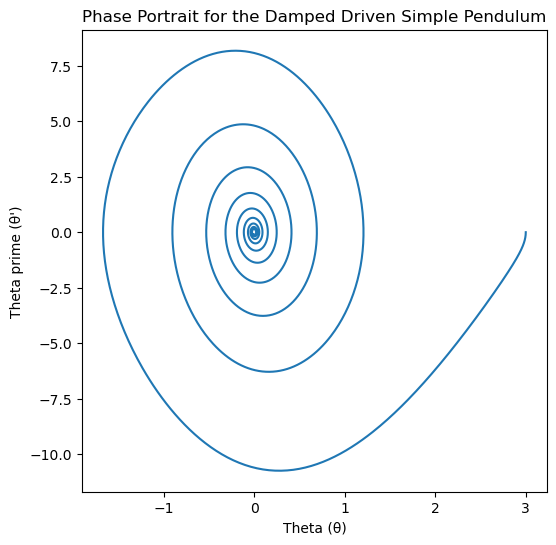

In [84]:
#Part (b)
import numpy as np
import matplotlib.pyplot as plt

#Constants
gamma = 1 
omega = 2 * np.pi
A = 0.1
nu = 100
theta_0 = 3
theta_prime = 0 
t0, tf = 0, 10

#f(t,y) function with damping terms
def f(t, y, gamma, omega, A, nu):
    theta, theta_prime = y
    return np.array([theta_prime, -gamma*theta_prime - omega**2 * np.sin(theta) - A * nu**2 * np.cos(nu*t) * np.sin(theta)])

#Define RK4 method 
def RK4(num_steps, theta_0, theta_prime, gamma, omega, A, nu):
    t = np.linspace(t0, tf, num_steps + 1)
    h = (tf - t0) / num_steps
    y = np.zeros((num_steps + 1, 2))
    y[0] = np.array([theta_0, theta_prime])
    
    for i in range(num_steps):
        ti = t[i]
        yi = y[i]
        k1 = f(ti, yi, gamma, omega, A, nu)
        k2 = f(ti + h/2, yi + h/2*k1, gamma, omega, A, nu)
        k3 = f(ti + h/2, yi + h/2*k2, gamma, omega, A, nu)
        k4 = f(ti + h, yi + h * k3, gamma, omega, A, nu)
        y[i + 1] = yi + h * (k1+ 2*k2 + 2*k3 + k4) / 6
    
    return t, y

#Finding convergence for RK4 method 
num_steps = 100
t_old, y_old = RK4(num_steps, theta_0, theta_prime,gamma,omega,A,nu)
converged = False

#Find what number of steps convergence will occur
while not(converged):
    #Try double steps
    num_steps *= 2
    print("Not converged yet. Trying", num_steps, "steps.")
    t_new, y_new = RK4(num_steps, theta_0, theta_prime,gamma,omega,A,nu)
    converged = np.allclose(y_old[:, 0], y_new[::2, 0], atol=1e-2, rtol=1e-2) and \
                np.allclose(y_old[:, 1], y_new[::2, 1], atol=1e-2, rtol=1e-2)
    y_old = y_new

print("Converged with", num_steps, "steps.")


#Plot solutions of damped driven Kapitza's pendulum and damped simple pendulum using RK4 results
t_kapitza, y_kapitza = RK4(num_steps, theta_0, theta_prime, gamma, omega, A, nu)
t_simple, y_simple = RK4(num_steps, theta_0, theta_prime, gamma, omega, 0, nu)  

plt.figure(figsize=(10, 6))
plt.plot(t_kapitza, y_kapitza[:, 0], label="Damped Driven Kapitza's Pendulum")
plt.plot(t_simple, y_simple[:, 0], label="Damped Driven Simple Pendulum")
plt.xlabel('Time (t)')
plt.ylabel('Theta (θ)')
plt.title('Theta (θ) vs Time (t)')
plt.legend()
plt.show()

#Phase portrait of damped driven Kapitza's pendulum
plt.figure(figsize=(6, 6))
plt.plot(y_kapitza[:, 0], y_kapitza[:, 1])
plt.xlabel('Theta (θ)')
plt.ylabel('Theta prime (θ\')')
plt.title("Phase Portrait for Damped Driven Kapitza's Pendulum")
plt.show()

#Phase portrait of simple pendulum with damping
plt.figure(figsize=(6, 6))
plt.plot(y_simple[:, 0], y_simple[:, 1])
plt.xlabel('Theta (θ)')
plt.ylabel('Theta prime (θ\')')
plt.title('Phase Portrait for the Damped Driven Simple Pendulum')
plt.show()


## <font color=#46769B>Problem 2: Leapfrog method</font>

Consider a __simple pendulum__, given by the equation of motion

$$\theta''(t) + \omega^2 \sin(\theta(t)) = 0 \, , $$

with $\omega = 2\pi$, and the boundary condition 

$$\theta(0) = 1 , \quad \theta'(0) = 0 \, .$$

Perform the following tasks:

- Write a function `leapfrog(num_steps)` (using a `def` statement) to implement the __leapfrog method__ for this system (kick-drift-kick algorithm) for the time interval $[0,5]$, where `num_steps` refers to the number of steps $N$. Your function should `return t, x, v`, so that you can call it as follows:
```py
t, x, v = leapfrog(num_steps)
```
where `t`, `x`, `v` are all `numpy.arrays` of length $N+1$. (To make the syntax clear with Lesson 9, note that $x(t) = \theta(t)$ is the displacement and $v(t) = \theta'(t)$ is the velocity of the pendulum.)

- Repeat the tasks of Exercise 8, Parts (a) and (c), using the leapfrog method. Include in your figures the results from the RK methods (using your code from Exercise 8) as well.

You should find that the leapfrog method has a better behavior with respect to energy conservation than RK methods. Specifically, although energy is not exactly conserved, the $\Delta E$ does not grow in time.

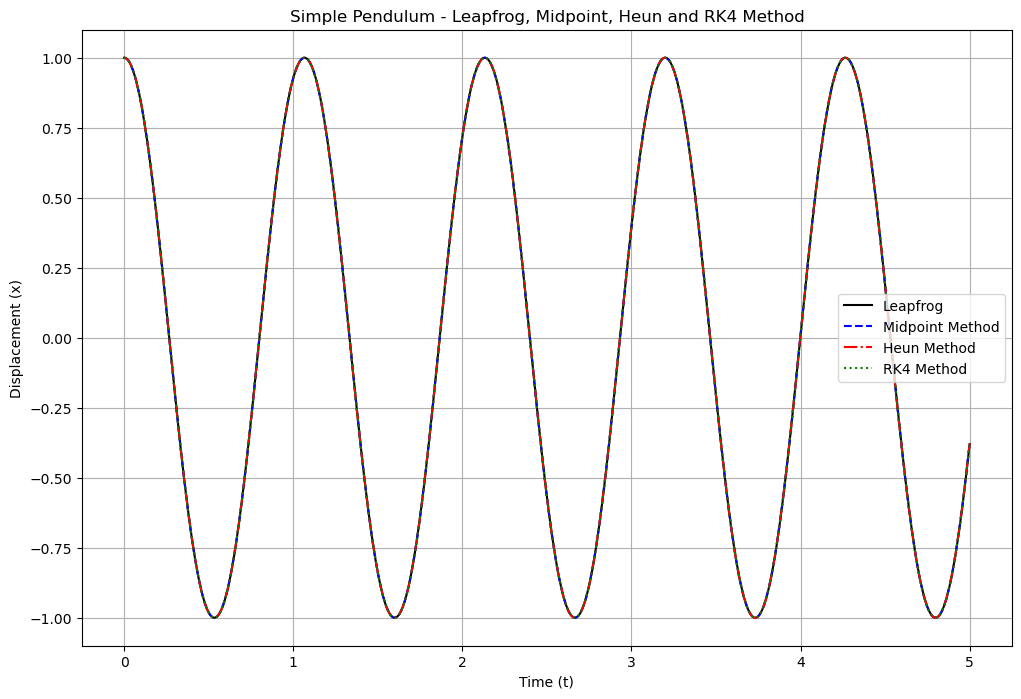

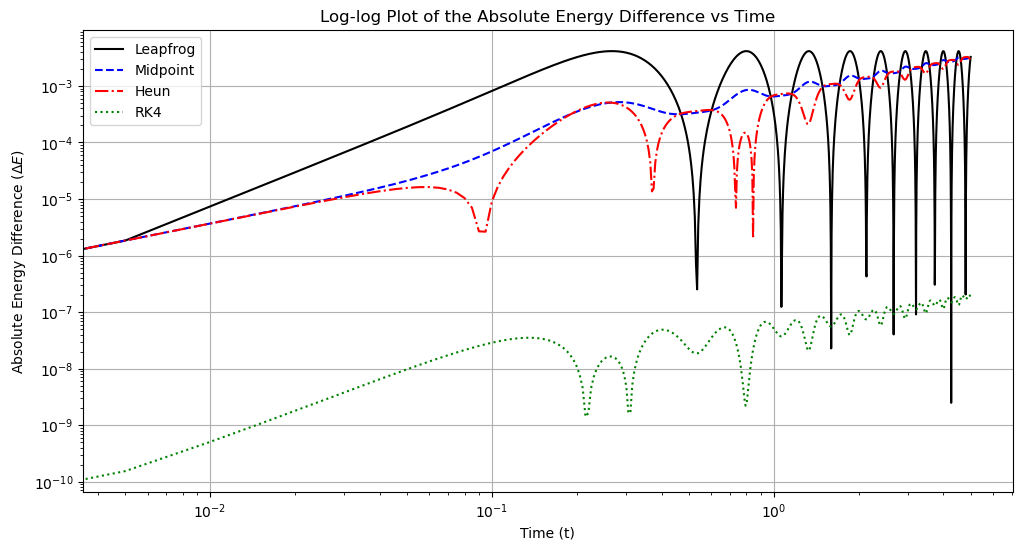

In [85]:
#Part (c)
import numpy as np
import matplotlib.pyplot as plt

#Constants
omega = 2 * np.pi
t0, tf = 0, 5
theta_0 = 1

#Acceleration function for leapfrog method
def accel(t, x):
    return -omega**2 * np.sin(x)

#Define function f(t,y)
def f(t, y):
    theta, theta_dot = y
    return np.array([theta_dot, -omega**2 * np.sin(theta)])

#Leapfrog method 
def leapfrog(num_steps):
    t = np.linspace(t0, tf, num=num_steps + 1)
    h = (tf - t0) / num_steps

    x = np.zeros(num_steps + 1)
    v = np.zeros(num_steps + 1)
    x[0], v[0] = theta_0, 0  # Initial conditions

    for i in range(num_steps):
        v_half = v[i] + h/2 * accel(t[i], x[i])
        x[i+1] = x[i] + h * v_half
        a_next = accel(t[i+1], x[i+1])
        v[i+1] = v_half + h/2 * a_next

    return t, x, v

def midpoint(num_steps):
    t = np.linspace(t0, tf, num=num_steps + 1)
    h = (tf - t0) / num_steps
    y = np.zeros((num_steps + 1, 2))
    y[0] = np.array([theta_0, 0])

    for i in range(num_steps):
        ti = t[i]
        yi = y[i]
        k1 = f(ti, yi)
        k2 = f(ti+h/2, yi+h/2*k1)
        y[i+1] = yi + h*k2

    return t, y

def Heun(num_steps):
    t = np.linspace(t0, tf, num=num_steps + 1)
    h = (tf - t0) / num_steps
    y = np.zeros((num_steps + 1, 2))
    y[0] = np.array([theta_0, 0])

    for i in range(num_steps):
        ti = t[i]
        yi = y[i]
        k1 = f(ti, yi)
        k2 = f(ti + h, yi + h*k1)
        y[i+1] = yi + h*(k1+k2)/2

    return t, y

def RK4(num_steps):
    t = np.linspace(t0, tf, num_steps + 1)
    h = (tf - t0) / num_steps
    y = np.zeros((num_steps + 1, 2))
    y[0] = np.array([theta_0, 0])

    for i in range(num_steps):
        ti = t[i]
        yi = y[i]
        k1 = f(ti, yi)
        k2 = f(ti + h/2, yi + h/2*k1)
        k3 = f(ti + h/2, yi + h/2*k2)
        k4 = f(ti + h, yi + h*k3)
        k = (k1+2*k2+2*k3+k4)/6
        y[i+1] = yi + h*k

    return t, y

#Function to calculate energy
def calculate_energy(theta_0, theta_prime,omega):
    return 0.5 * theta_prime**2 + (1 - np.cos(theta_0))* omega**2

num_steps = 1000
t_lf, x_lf, v_lf = leapfrog(num_steps)
t_mid, y_mid = midpoint(num_steps)
t_heun, y_heun = Heun(num_steps)
t_RK4, y_RK4 = RK4(num_steps)

#Plotting graph like part a Exercise 8
plt.figure(figsize=(12, 8))
plt.plot(t_lf, y_lf, label='Leapfrog', linestyle='-', color='black')
plt.plot(t_mid, y_mid[:,0], label='Midpoint Method', linestyle='--', color='blue')
plt.plot(t_heun, y_heun[:,0], label='Heun Method', linestyle='-.', color='red')
plt.plot(t_RK4, y_RK4[:,0], label='RK4 Method', linestyle=':', color='green')

plt.xlabel('Time (t)')
plt.ylabel('Displacement (x)')
plt.title('Simple Pendulum - Leapfrog, Midpoint, Heun and RK4 Method')
plt.legend()
plt.grid(True)
plt.show()

#Calculate energies
E_lf = calculate_energy(x_lf, v_lf, omega)
E_mp = calculate_energy(y_mid[:, 0], y_mid[:, 1], omega)
E_he = calculate_energy(y_heun[:, 0], y_heun[:, 1], omega)
E_rk = calculate_energy(y_RK4[:, 0], y_RK4[:, 1], omega)

#Initial energy
E_0 = calculate_energy(np.array([theta_0]), np.array([0]), omega)

#Energy differences
DeltaE_lf = np.abs(E_lf-E_0)
DeltaE_mid = np.abs(E_mp-E_0)
DeltaE_heun = np.abs(E_he-E_0)
DeltaE_RK4 = np.abs(E_rk-E_0)

#Log-log plot for energy differences (like Part c Exercise 8)
plt.figure(figsize=(12, 6))
plt.loglog(t_lf, DeltaE_lf, label='Leapfrog', color='black')
plt.loglog(t_mid, DeltaE_mid, label='Midpoint', color='blue', linestyle='--')
plt.loglog(t_heun, DeltaE_heun, label='Heun', color='red', linestyle='-.')
plt.loglog(t_RK4, DeltaE_RK4, label='RK4', color='green', linestyle=':')

plt.xlabel('Time (t)')
plt.ylabel('Absolute Energy Difference ($\Delta E$)')
plt.title('Log-log Plot of the Absolute Energy Difference vs Time')
plt.legend()
plt.grid(True)
plt.show()
